In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns

# Speed Prediction

In [2]:
org = pd.read_csv("outlier_removed_org.csv")
org.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
0,90.301086,19.310339,46.627861,-92.912933,37.219505,4999.959473,-141.435104,52.935848,35.045197,27.430012,20.899378,48.561615
1,90.450218,19.312284,46.660896,-92.856468,37.326965,4999.958008,-141.503265,52.955212,35.090080,27.474701,21.009548,48.472355
2,90.530746,19.303518,46.493481,-92.806671,37.351593,4999.955078,-141.524933,52.981113,35.137783,27.520298,21.024719,48.556767
3,90.633858,19.265827,46.390057,-92.744507,37.405773,4999.953613,-141.659454,52.957489,35.175957,27.596558,21.067995,48.486523
4,90.783813,19.215105,46.461845,-92.682083,37.428577,4999.952637,-141.654755,52.955505,35.237061,27.663696,21.140137,48.430492


In [3]:
X = org.drop(['motor_speed'], axis=1)
X.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,i_d,i_q,pm,stator_yoke,ambient,torque
0,90.301086,19.310339,46.627861,-92.912933,37.219505,-141.435104,52.935848,35.045197,27.430012,20.899378,48.561615
1,90.450218,19.312284,46.660896,-92.856468,37.326965,-141.503265,52.955212,35.090080,27.474701,21.009548,48.472355
2,90.530746,19.303518,46.493481,-92.806671,37.351593,-141.524933,52.981113,35.137783,27.520298,21.024719,48.556767
3,90.633858,19.265827,46.390057,-92.744507,37.405773,-141.659454,52.957489,35.175957,27.596558,21.067995,48.486523
4,90.783813,19.215105,46.461845,-92.682083,37.428577,-141.654755,52.955505,35.237061,27.663696,21.140137,48.430492


In [4]:
y = org[['motor_speed']]
y.head()

,motor_speed
0,4999.959473
1,4999.958008
2,4999.955078
3,4999.953613
4,4999.952637


In [5]:
kf = KFold(n_splits=10)
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [6]:
for train_index, test_index in kf.split(org):
    print(train_index, test_index)

[ 92629  92630  92631 ... 926282 926283 926284] [    0     1     2 ... 92626 92627 92628]
[     0      1      2 ... 926282 926283 926284] [ 92629  92630  92631 ... 185255 185256 185257]
[     0      1      2 ... 926282 926283 926284] [185258 185259 185260 ... 277884 277885 277886]
[     0      1      2 ... 926282 926283 926284] [277887 277888 277889 ... 370513 370514 370515]
[     0      1      2 ... 926282 926283 926284] [370516 370517 370518 ... 463142 463143 463144]
[     0      1      2 ... 926282 926283 926284] [463145 463146 463147 ... 555770 555771 555772]
[     0      1      2 ... 926282 926283 926284] [555773 555774 555775 ... 648398 648399 648400]
[     0      1      2 ... 926282 926283 926284] [648401 648402 648403 ... 741026 741027 741028]
[     0      1      2 ... 926282 926283 926284] [741029 741030 741031 ... 833654 833655 833656]
[     0      1      2 ... 833654 833655 833656] [833657 833658 833659 ... 926282 926283 926284]


In [12]:
folds = KFold(n_splits=10, shuffle=True, random_state=42)

scores_mlr_mse = []
scores_mlr_r2 = []
scores_poly_mse = []
scores_poly_r2 = []
scores_knn_mse = []
scores_knn_r2 = []

for train_index, test_index in folds.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Linear Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred_lr = lr_model.predict(X_test)
    mse_lr = mean_squared_error(y_test, y_pred_lr)
    r2_lr = r2_score(y_test, y_pred_lr)
    scores_mlr_r2.append(r2_lr)
    scores_mlr_mse.append(mse_lr)

    # Polynomial Regression (degree=2)
    poly_features = PolynomialFeatures(degree=2)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    lr_model_poly = LinearRegression()
    lr_model_poly.fit(X_train_poly, y_train)
    y_pred_poly = lr_model_poly.predict(X_test_poly)
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)
    scores_poly_r2.append(r2_poly)
    scores_poly_mse.append(mse_poly)

    # k-Nearest Neighbors (KNN)
    knn_model = KNeighborsRegressor(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    mse_knn = mean_squared_error(y_test, y_pred_knn)
    r2_knn = r2_score(y_test, y_pred_knn)
    scores_knn_r2.append(r2_knn)
    scores_knn_mse.append(mse_knn)

mean_mse_lr = np.mean(scores_mlr_mse)
mean_r2_lr = np.mean(scores_mlr_r2)
print("Linear Regression:")
print("Mean R-squared (R2) Score:", mean_r2_lr)
print("Mean Squared Error:", mean_mse_lr)

mean_mse_poly = np.mean(scores_poly_mse)
mean_r2_poly = np.mean(scores_poly_r2)
print("\nPolynomial Regression (degree=2):")
print("Mean R-squared (R2) Score:", mean_r2_poly)
print("Mean Squared Error:", mean_mse_poly)

mean_mse_knn = np.mean(scores_knn_mse)
mean_r2_knn = np.mean(scores_knn_r2)
print("\nk-Nearest Neighbors (KNN):")
print("Mean R-squared (R2) Score:", mean_r2_knn)
print("Mean Squared Error:", mean_mse_knn)

max_r2_index_lr = np.argmax(scores_mlr_r2)
max_r2_lr = scores_mlr_r2[max_r2_index_lr]
print("\nMaximum R-squared (R2) Score (Linear Regression):", max_r2_lr, "in Fold:", max_r2_index_lr)

max_r2_index_poly = np.argmax(scores_poly_r2)
max_r2_poly = scores_poly_r2[max_r2_index_poly]
print("Maximum R-squared (R2) Score (Polynomial Regression):", max_r2_poly, "in Fold:", max_r2_index_poly)

max_r2_index_knn = np.argmax(scores_knn_r2)
max_r2_knn = scores_knn_r2[max_r2_index_knn]
print("Maximum R-squared (R2) Score (k-Nearest Neighbors - KNN):", max_r2_knn, "in Fold:", max_r2_index_knn)

Linear Regression:
Mean R-squared (R2) Score: 0.984070691744094
Mean Squared Error: 50898.9907167753

Polynomial Regression (degree=2):
Mean R-squared (R2) Score: 0.9991946773809748
Mean Squared Error: 2573.293618932573

k-Nearest Neighbors (KNN):
Mean R-squared (R2) Score: 0.999714181892203
Mean Squared Error: 913.2258609153012

Maximum R-squared (R2) Score (Linear Regression): 0.984469686246369 in Fold: 0
Maximum R-squared (R2) Score (Polynomial Regression): 0.9992260469763745 in Fold: 0
Maximum R-squared (R2) Score (k-Nearest Neighbors - KNN): 0.9997313928120863 in Fold: 7


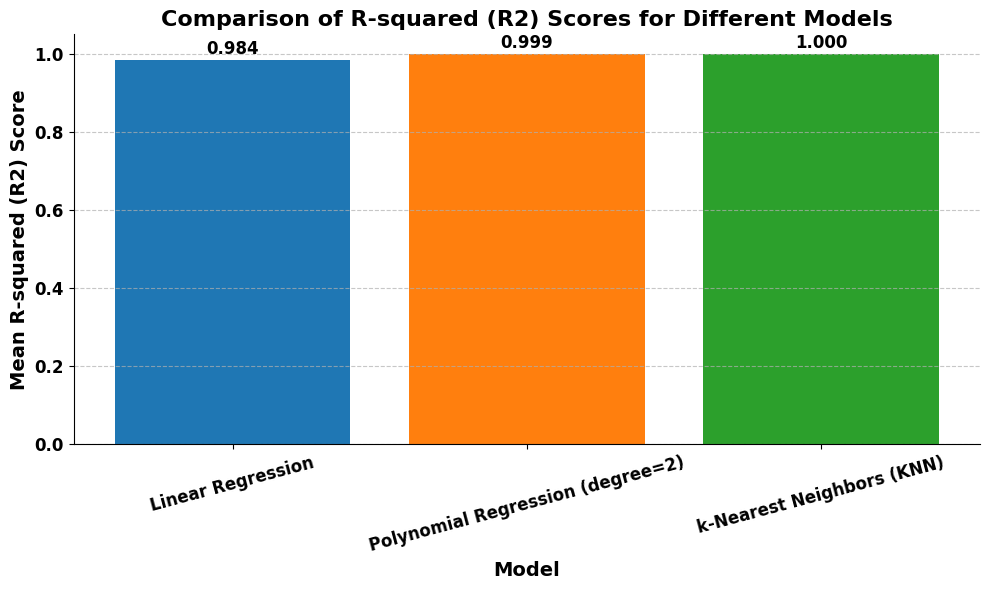

In [19]:
# Create a list of model names for the x-axis
models = ['Linear Regression', 'Polynomial Regression (degree=2)', 'k-Nearest Neighbors (KNN)']

# Create a list of mean R-squared (R2) scores for the y-axis
mean_r2_scores = [max_r2_lr, max_r2_poly, max_r2_knn]

# Set a custom color palette for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Create a bar plot with customizations
plt.figure(figsize=(10, 6))
plt.bar(models, mean_r2_scores, color=colors)

# Add labels and title with custom font properties
plt.xlabel('Model', fontsize=14, fontweight='bold')
plt.ylabel('Mean R-squared (R2) Score', fontsize=14, fontweight='bold')
plt.title('Comparison of R-squared (R2) Scores for Different Models', fontsize=16, fontweight='bold')

# Add data labels above each bar
for i, v in enumerate(mean_r2_scores):
    plt.text(i, v + 0.005, f'{v:.3f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Customize ticks and labels
plt.xticks(fontsize=12, fontweight='bold', rotation=15)
plt.yticks(fontsize=12, fontweight='bold')

# Add a horizontal grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


# Torque Prediction

In [20]:
X = org.drop(columns=['torque'])
y = org[['torque']]

In [21]:
folds = KFold(n_splits=10, shuffle=True, random_state=42)

scores_mlr_mse = []
scores_mlr_r2 = []
scores_poly_mse = []
scores_poly_r2 = []
scores_knn_mse = []
scores_knn_r2 = []

for train_index, test_index in folds.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Linear Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred_lr = lr_model.predict(X_test)
    mse_lr = mean_squared_error(y_test, y_pred_lr)
    r2_lr = r2_score(y_test, y_pred_lr)
    scores_mlr_r2.append(r2_lr)
    scores_mlr_mse.append(mse_lr)

    # Polynomial Regression (degree=2)
    poly_features = PolynomialFeatures(degree=2)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    lr_model_poly = LinearRegression()
    lr_model_poly.fit(X_train_poly, y_train)
    y_pred_poly = lr_model_poly.predict(X_test_poly)
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)
    scores_poly_r2.append(r2_poly)
    scores_poly_mse.append(mse_poly)

    # k-Nearest Neighbors (KNN)
    knn_model = KNeighborsRegressor(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    mse_knn = mean_squared_error(y_test, y_pred_knn)
    r2_knn = r2_score(y_test, y_pred_knn)
    scores_knn_r2.append(r2_knn)
    scores_knn_mse.append(mse_knn)

mean_mse_lr = np.mean(scores_mlr_mse)
mean_r2_lr = np.mean(scores_mlr_r2)
print("Linear Regression:")
print("Mean R-squared (R2) Score:", mean_r2_lr)
print("Mean Squared Error:", mean_mse_lr)

mean_mse_poly = np.mean(scores_poly_mse)
mean_r2_poly = np.mean(scores_poly_r2)
print("\nPolynomial Regression (degree=2):")
print("Mean R-squared (R2) Score:", mean_r2_poly)
print("Mean Squared Error:", mean_mse_poly)

mean_mse_knn = np.mean(scores_knn_mse)
mean_r2_knn = np.mean(scores_knn_r2)
print("\nk-Nearest Neighbors (KNN):")
print("Mean R-squared (R2) Score:", mean_r2_knn)
print("Mean Squared Error:", mean_mse_knn)

max_r2_index_lr = np.argmax(scores_mlr_r2)
max_r2_lr = scores_mlr_r2[max_r2_index_lr]
print("\nMaximum R-squared (R2) Score (Linear Regression):", max_r2_lr, "in Fold:", max_r2_index_lr)

max_r2_index_poly = np.argmax(scores_poly_r2)
max_r2_poly = scores_poly_r2[max_r2_index_poly]
print("Maximum R-squared (R2) Score (Polynomial Regression):", max_r2_poly, "in Fold:", max_r2_index_poly)

max_r2_index_knn = np.argmax(scores_knn_r2)
max_r2_knn = scores_knn_r2[max_r2_index_knn]
print("Maximum R-squared (R2) Score (k-Nearest Neighbors - KNN):", max_r2_knn, "in Fold:", max_r2_index_knn)

Linear Regression:
Mean R-squared (R2) Score: 0.99837452733001
Mean Squared Error: 5.187814745703993

Polynomial Regression (degree=2):
Mean R-squared (R2) Score: 0.9997364434652557
Mean Squared Error: 0.8413265692281154

k-Nearest Neighbors (KNN):
Mean R-squared (R2) Score: 0.9996094656239286
Mean Squared Error: 1.2462806102346904

Maximum R-squared (R2) Score (Linear Regression): 0.9984140628895537 in Fold: 0
Maximum R-squared (R2) Score (Polynomial Regression): 0.9997925685851499 in Fold: 4
Maximum R-squared (R2) Score (k-Nearest Neighbors - KNN): 0.9996330077040335 in Fold: 1


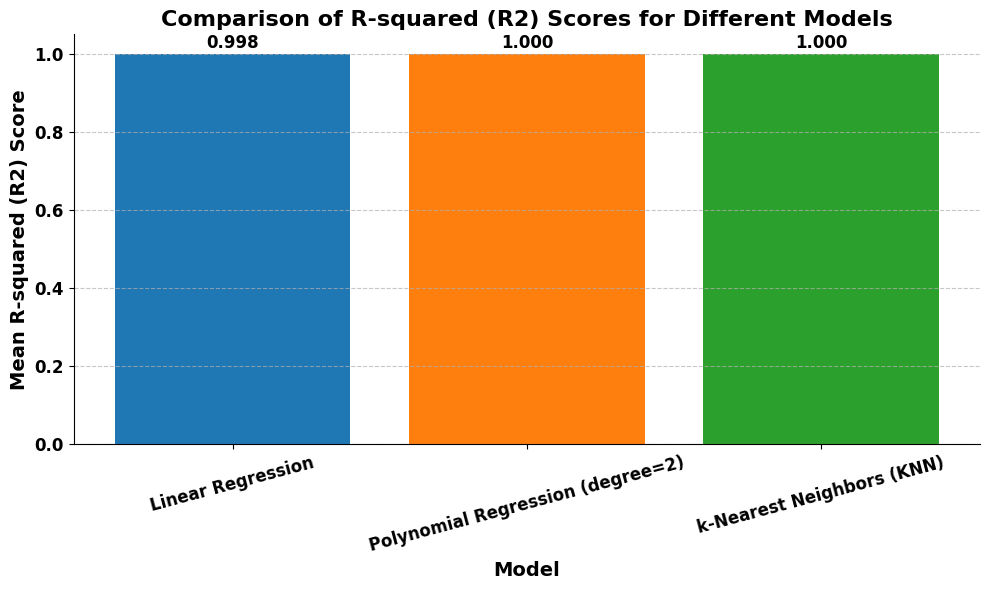

In [22]:
# Create a list of model names for the x-axis
models = ['Linear Regression', 'Polynomial Regression (degree=2)', 'k-Nearest Neighbors (KNN)']

# Create a list of mean R-squared (R2) scores for the y-axis
mean_r2_scores = [max_r2_lr, max_r2_poly, max_r2_knn]

# Set a custom color palette for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Create a bar plot with customizations
plt.figure(figsize=(10, 6))
plt.bar(models, mean_r2_scores, color=colors)

# Add labels and title with custom font properties
plt.xlabel('Model', fontsize=14, fontweight='bold')
plt.ylabel('Mean R-squared (R2) Score', fontsize=14, fontweight='bold')
plt.title('Comparison of R-squared (R2) Scores for Different Models', fontsize=16, fontweight='bold')

# Add data labels above each bar
for i, v in enumerate(mean_r2_scores):
    plt.text(i, v + 0.005, f'{v:.3f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Customize ticks and labels
plt.xticks(fontsize=12, fontweight='bold', rotation=15)
plt.yticks(fontsize=12, fontweight='bold')

# Add a horizontal grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Coolant Temp Prediction

In [24]:
X = org.drop(columns=['coolant'])
y = org[['coolant']]

In [27]:
folds = KFold(n_splits=10, shuffle=True, random_state=42)

scores_mlr_mse = []
scores_mlr_r2 = []
scores_poly_mse = []
scores_poly_r2 = []
scores_knn_mse = []
scores_knn_r2 = []
scores_xgb_mse = []
scores_xgb_r2 = []
scores_pca_mse = []
scores_pca_r2 = []
scores_en_mse = []
scores_en_r2 = []

for train_index, test_index in folds.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Linear Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred_lr = lr_model.predict(X_test)
    mse_lr = mean_squared_error(y_test, y_pred_lr)
    r2_lr = r2_score(y_test, y_pred_lr)
    scores_mlr_r2.append(r2_lr)
    scores_mlr_mse.append(mse_lr)

    # Polynomial Regression (degree=2)
    poly_features = PolynomialFeatures(degree=2)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    lr_model_poly = LinearRegression()
    lr_model_poly.fit(X_train_poly, y_train)
    y_pred_poly = lr_model_poly.predict(X_test_poly)
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)
    scores_poly_r2.append(r2_poly)
    scores_poly_mse.append(mse_poly)

    # k-Nearest Neighbors (KNN)
    knn_model = KNeighborsRegressor(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    mse_knn = mean_squared_error(y_test, y_pred_knn)
    r2_knn = r2_score(y_test, y_pred_knn)
    scores_knn_r2.append(r2_knn)
    scores_knn_mse.append(mse_knn)

    # XGBoost
    xgb_model = XGBRegressor(n_estimators=100, random_state=42)
    xgb_model.fit(X_train, y_train)
    y_pred_xgb = xgb_model.predict(X_test)
    mse_xgb = mean_squared_error(y_test, y_pred_xgb)
    r2_xgb = r2_score(y_test, y_pred_xgb)
    scores_xgb_r2.append(r2_xgb)
    scores_xgb_mse.append(mse_xgb)

    # PCA
    pca = PCA(n_components=5)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    lr_model_pca = LinearRegression()
    lr_model_pca.fit(X_train_pca, y_train)
    y_pred_pca = lr_model_pca.predict(X_test_pca)
    mse_pca = mean_squared_error(y_test, y_pred_pca)
    r2_pca = r2_score(y_test, y_pred_pca)
    scores_pca_r2.append(r2_pca)
    scores_pca_mse.append(mse_pca)

    # Elastic Net
    en_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
    en_model.fit(X_train, y_train)
    y_pred_en = en_model.predict(X_test)
    mse_en = mean_squared_error(y_test, y_pred_en)
    r2_en = r2_score(y_test, y_pred_en)
    scores_en_r2.append(r2_en)
    scores_en_mse.append(mse_en)

mean_mse_lr = np.mean(scores_mlr_mse)
mean_r2_lr = np.mean(scores_mlr_r2)
print("Linear Regression:")
print("Mean R-squared (R2) Score:", mean_r2_lr)
print("Mean Squared Error:", mean_mse_lr)

mean_mse_poly = np.mean(scores_poly_mse)
mean_r2_poly = np.mean(scores_poly_r2)
print("\nPolynomial Regression (degree=2):")
print("Mean R-squared (R2) Score:", mean_r2_poly)
print("Mean Squared Error:", mean_mse_poly)

mean_mse_knn = np.mean(scores_knn_mse)
mean_r2_knn = np.mean(scores_knn_r2)
print("\nk-Nearest Neighbors (KNN):")
print("Mean R-squared (R2) Score:", mean_r2_knn)
print("Mean Squared Error:", mean_mse_knn)

mean_mse_xgb = np.mean(scores_xgb_mse)
mean_r2_xgb = np.mean(scores_xgb_r2)
print("\nXGBoost:")
print("Mean R-squared (R2) Score:", mean_r2_xgb)
print("Mean Squared Error:", mean_mse_xgb)

mean_mse_pca = np.mean(scores_pca_mse)
mean_r2_pca = np.mean(scores_pca_r2)
print("\nPCA with Linear Regression:")
print("Mean R-squared (R2) Score:", mean_r2_pca)
print("Mean Squared Error:", mean_mse_pca)

mean_mse_en = np.mean(scores_en_mse)
mean_r2_en = np.mean(scores_en_r2)
print("\nElastic Net:")
print("Mean R-squared (R2) Score:", mean_r2_en)
print("Mean Squared Error:", mean_mse_en)

max_r2_index_lr = np.argmax(scores_mlr_r2)
max_r2_lr = scores_mlr_r2[max_r2_index_lr]
print("\nMaximum R-squared (R2) Score (Linear Regression):", max_r2_lr, "in Fold:", max_r2_index_lr)

max_r2_index_poly = np.argmax(scores_poly_r2)
max_r2_poly = scores_poly_r2[max_r2_index_poly]
print("Maximum R-squared (R2) Score (Polynomial Regression):", max_r2_poly, "in Fold:", max_r2_index_poly)

max_r2_index_knn = np.argmax(scores_knn_r2)
max_r2_knn = scores_knn_r2[max_r2_index_knn]
print("Maximum R-squared (R2) Score (k-Nearest Neighbors - KNN):", max_r2_knn, "in Fold:", max_r2_index_knn)

max_r2_index_xgb = np.argmax(scores_xgb_r2)
max_r2_xgb = scores_xgb_r2[max_r2_index_xgb]
print("Maximum R-squared (R2) Score (XGBoost):", max_r2_xgb, "in Fold:", max_r2_index_xgb)

max_r2_index_pca = np.argmax(scores_pca_r2)
max_r2_pca = scores_pca_r2[max_r2_index_pca]
print("Maximum R-squared (R2) Score (PCA with Linear Regression):", max_r2_pca, "in Fold:", max_r2_index_pca)

max_r2_index_en = np.argmax(scores_en_r2)
max_r2_en = scores_en_r2[max_r2_index_en]
print("Maximum R-squared (R2) Score (Elastic Net):", max_r2_en, "in Fold:", max_r2_index_en)

D:\Jupyter ipynb\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.825e+06, tolerance: 2.360e+04
  model = cd_fast.enet_coordinate_descent(
D:\Jupyter ipynb\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.836e+06, tolerance: 2.359e+04
  model = cd_fast.enet_coordinate_descent(
D:\Jupyter ipynb\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.825e+06, tolerance: 

Linear Regression:
Mean R-squared (R2) Score: 0.9703189929634606
Mean Squared Error: 8.399821329882318

Polynomial Regression (degree=2):
Mean R-squared (R2) Score: 0.9746875262974125
Mean Squared Error: 7.163520602979148

k-Nearest Neighbors (KNN):
Mean R-squared (R2) Score: 0.950351293638373
Mean Squared Error: 14.050737317097916

XGBoost:
Mean R-squared (R2) Score: 0.9920460502983979
Mean Squared Error: 2.250976201768258

PCA with Linear Regression:
Mean R-squared (R2) Score: 0.6480578170620636
Mean Squared Error: 99.59716911531767

Elastic Net:
Mean R-squared (R2) Score: 0.9695189375195981
Mean Squared Error: 8.626283271572856

Maximum R-squared (R2) Score (Linear Regression): 0.9711736970854594 in Fold: 5
Maximum R-squared (R2) Score (Polynomial Regression): 0.9753868075751134 in Fold: 5
Maximum R-squared (R2) Score (k-Nearest Neighbors - KNN): 0.9515182477407873 in Fold: 7
Maximum R-squared (R2) Score (XGBoost): 0.9922280250799241 in Fold: 6
Maximum R-squared (R2) Score (PCA with

D:\Jupyter ipynb\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.818e+06, tolerance: 2.358e+04
  model = cd_fast.enet_coordinate_descent(


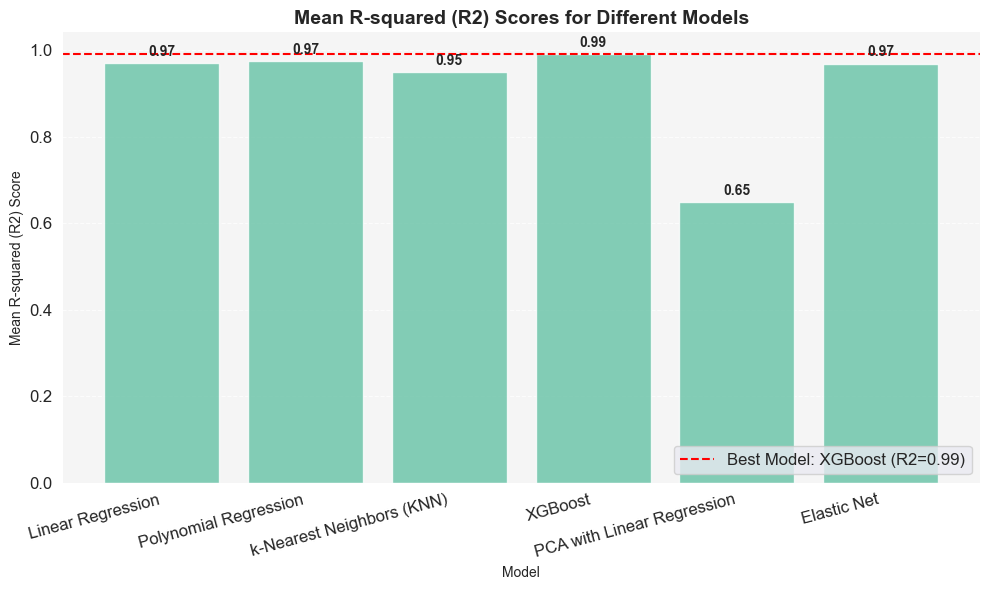

In [37]:
# Set a custom color palette
sns.set_palette("Set2")

# R-squared scores and model names
r2_scores = [mean_r2_lr, mean_r2_poly, mean_r2_knn, mean_r2_xgb, mean_r2_pca, mean_r2_en]
model_names = ['Linear Regression', 'Polynomial Regression', 'k-Nearest Neighbors (KNN)', 'XGBoost', 'PCA with Linear Regression', 'Elastic Net']

# Find the model with the highest R-squared score
best_model_index = np.argmax(r2_scores)
best_model_name = model_names[best_model_index]
best_model_score = r2_scores[best_model_index]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, r2_scores, alpha=0.8)
plt.xlabel('Model')
plt.ylabel('Mean R-squared (R2) Score')
plt.title('Mean R-squared (R2) Scores for Different Models', fontsize=14, fontweight='bold')

# Customizing plot appearance
plt.xticks(rotation=15, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.axhline(y=best_model_score, color='r', linestyle='--', label=f'Best Model: {best_model_name} (R2={best_model_score:.2f})')

# Adding grid lines and removing top and right spines
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(right=True, top=True)

# Adding data labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customizing plot background and legend
plt.legend(fontsize=12, loc='lower right')
plt.gca().set_facecolor('whitesmoke')
plt.tight_layout()

# Display the plot
plt.show()